In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

dta=pd.read_csv('data.csv')
dta.head(10)

,NumPreg,PlasmaGlucose,DiastolicBP,TricepSkin,BodyMassIndex,Pedigree,Age,Diabetic
0,5,86,68,28,30.2,0.364,24,0
1,7,195,70,33,25.1,0.163,55,1
2,5,77,82,41,35.8,0.156,35,0
3,0,165,76,43,47.9,0.259,26,0
4,0,107,60,25,26.4,0.133,23,0
5,5,97,76,27,35.6,0.378,52,1
6,3,83,58,31,34.3,0.336,25,0
7,1,193,50,16,25.9,0.655,24,0
8,3,142,80,15,32.4,0.200,63,0
9,2,128,78,37,43.3,1.224,31,1


In [2]:
# print the number of persons from the dataframe
print("Number of persons tested for diabetics:" +str(len(dta.index)))

Number of persons tested for diabetics:200


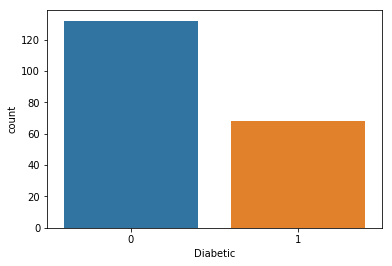

In [3]:
sns.countplot(x="Diabetic",data=dta)

In [4]:
dta.isnull().sum()

NumPreg          0
PlasmaGlucose    0
DiastolicBP      0
TricepSkin       0
BodyMassIndex    0
Pedigree         0
Age              0
Diabetic         0
dtype: int64

In [5]:
X=dta.drop("Diabetic",axis=1)
y=dta["Diabetic"]

In [6]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\iitp\anaconda3\lib\site-packages (0.21.3)
Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
# instantiate model
logreg = LogisticRegression()

In [11]:
logreg.fit(X_train, y_train)

C:\Users\IITP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
predictions = logreg.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, predictions)

0.74

In [15]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:20]

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [16]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:20]

array([[0.56844556, 0.43155444],
       [0.22726956, 0.77273044],
       [0.72272026, 0.27727974],
       [0.89963142, 0.10036858],
       [0.2997195 , 0.7002805 ],
       [0.6967486 , 0.3032514 ],
       [0.18866815, 0.81133185],
       [0.84252262, 0.15747738],
       [0.76700707, 0.23299293],
       [0.916383  , 0.083617  ],
       [0.82989995, 0.17010005],
       [0.53392503, 0.46607497],
       [0.3318909 , 0.6681091 ],
       [0.59907592, 0.40092408],
       [0.47085433, 0.52914567],
       [0.61311865, 0.38688135],
       [0.33292256, 0.66707744],
       [0.23637137, 0.76362863],
       [0.85038027, 0.14961973],
       [0.49569881, 0.50430119]])

In [17]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:20, 1]

array([0.43155444, 0.77273044, 0.27727974, 0.10036858, 0.7002805 ,
       0.3032514 , 0.81133185, 0.15747738, 0.23299293, 0.083617  ,
       0.17010005, 0.46607497, 0.6681091 , 0.40092408, 0.52914567,
       0.38688135, 0.66707744, 0.76362863, 0.14961973, 0.50430119])

In [18]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

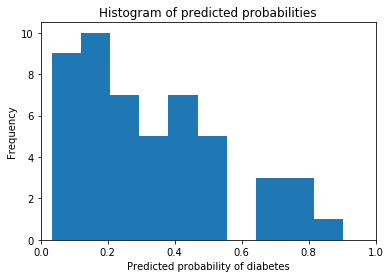

In [19]:
#histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [20]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    37
1    13
Name: Diabetic, dtype: int64

In [21]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.26

In [22]:
# calculate the percentage of zeros
1 - y_test.mean()

0.74

In [23]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', predictions[0:25])

True: [0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0]
False: [0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0]


In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, predictions)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[32  5]
 [ 8  5]]


In [26]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

0.74


In [27]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)

0.26


In [28]:
sensitivity = TP / float(FN + TP)

print(sensitivity)

0.38461538461538464


In [29]:
specificity = TN / (TN + FP)

print(specificity)

0.8648648648648649


In [30]:
precision = TP / float(TP + FP)

print(precision)

0.5


In [31]:
from sklearn.metrics import roc_curve

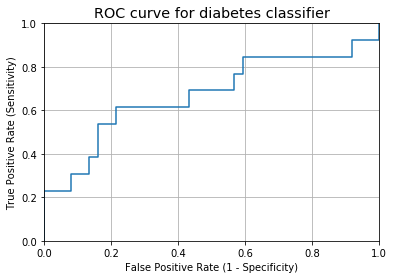

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [33]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [34]:
evaluate_threshold(0.5)

Sensitivity: 0.38461538461538464
Specificity: 0.8648648648648649


In [35]:
evaluate_threshold(0.2)

Sensitivity: 0.7692307692307693
Specificity: 0.43243243243243246


In [36]:
evaluate_threshold(0.21)

Sensitivity: 0.7692307692307693
Specificity: 0.43243243243243246


In [37]:
evaluate_threshold(0.19)

Sensitivity: 0.7692307692307693
Specificity: 0.4054054054054054


In [38]:
evaluate_threshold(0.1)

Sensitivity: 0.8461538461538461
Specificity: 0.4054054054054054


In [39]:
evaluate_threshold(0.15)

Sensitivity: 0.8461538461538461
Specificity: 0.4054054054054054


In [40]:
evaluate_threshold(0.17)

Sensitivity: 0.8461538461538461
Specificity: 0.4054054054054054
